In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

In [73]:
def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

In [14]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
norm_arr_nonint=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)
    #print norm_arr_nonint[i], mu_arr[i]

In [97]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=8
hz=5.00
norm_arr_int=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int[i]=norm(A_lamb)
    #print norm_arr_int[i], mu_arr[i]

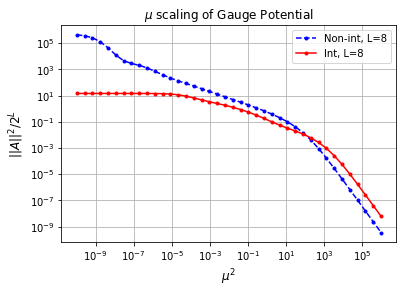

In [98]:
plt.loglog(mu_arr**2,norm_arr_nonint**2/2**8, 'b.--', label='Non-int, L=8')
#plt.loglog(mu_arr**2,norm_arr_nonintL10**2/2**10, 'b+--', label='Non-int, L=10')
plt.loglog(mu_arr**2,norm_arr_int**2/2**8, 'r.-', label='Int, L=8')
#plt.loglog(mu_arr**2,norm_arr_intL10**2/2**10, 'r+-', label='Int, L=10')
plt.xlabel(r"$\mu^2$",fontsize=12)
plt.ylabel(r"$||A||^2/2^L$", fontsize=12)
#plt.xlim((10**(-7),10**5))
#plt.ylim((10**(-10),10**6))
plt.grid()
plt.title("$\mu$ scaling of Gauge Potential")
plt.legend()
#plt.savefig("v1_norm_compar.eps")

In [68]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
norm_arr_nonintL10=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonintL10[i]=norm(A_lamb)

In [69]:
muTot=40
mu_arr=np.logspace(-5,3.0,muTot)
L=10
hz=10.00
norm_arr_intL10=np.zeros(muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_intL10[i]=norm(A_lamb)

### Fitting of plot

In [6]:
x=np.linspace(0.5,10,100)

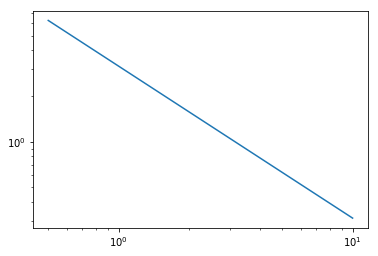

In [9]:
plt.loglog(x, np.pi/x)

In [70]:
from scipy.optimize import curve_fit
def gfunc(x, a,c):
    return a *x**c

[ 2.45815275 -1.50749061]


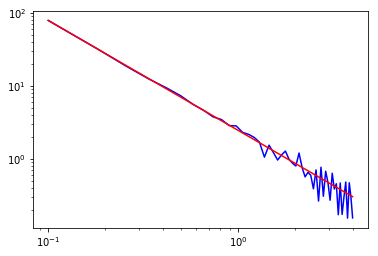

In [79]:
xdata = np.linspace(0.1, 4, 50)
y = gfunc(xdata, 2.5, -1.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.loglog(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(gfunc, xdata, ydata)
plt.loglog(xdata, gfunc(xdata, *popt), 'r-', label='fit')
print popt

In [85]:
def gfunc(x, a,c): #logfunction
    return a+ c*x
xdata =mu_arr
ydata = norm_arr_nonint**2/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt
#a,b=popt
#print a,b

[-3.71401382 -1.62670152] [[ 0.19038712  0.01251492]
 [ 0.01251492  0.00543516]]


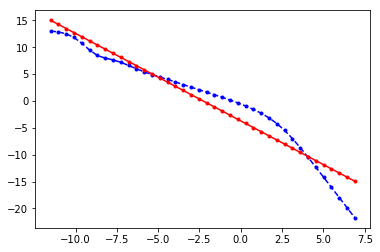

In [84]:
plt.plot(np.log(mu_arr),np.log(norm_arr_nonint**2/2**8), 'b.--')
plt.plot(np.log(mu_arr), gfunc(np.log(mu_arr),*popt), 'r.-', label='fit')

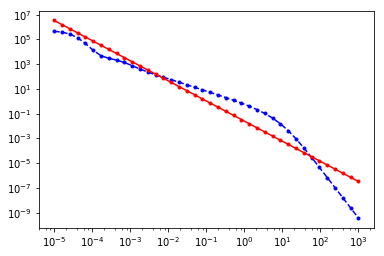

In [95]:
plt.loglog(mu_arr,norm_arr_nonint**2/2**8, 'b.--')
plt.loglog(mu_arr, org_func(mu_arr,np.exp(a_in),b_in), 'r.-', label='fit')

In [11]:
def org_func(x, a,c):
    return a*x**c

In [89]:
a_in,b_in=popt

In [91]:
np.exp(a_in)

0.024379471874568188

In [96]:
b_in

-1.6267015166446712

In [2]:
x1,y1=np.loadtxt("v1.0_L8_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x2,y2=np.loadtxt("v1.0_L8_int_mu_scaling.dat",unpack=True,skiprows=2 )
x3,y3=np.loadtxt("v1.0_L10_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x4,y4=np.loadtxt("v1.0_L10_int_mu_scaling.dat",unpack=True,skiprows=2 )
x5,y5=np.loadtxt("v1.0_L12_nonint_mu_scaling.dat",unpack=True,skiprows=2 )
x6,y6=np.loadtxt("v1.0_L12_int_mu_scaling.dat",unpack=True,skiprows=2)

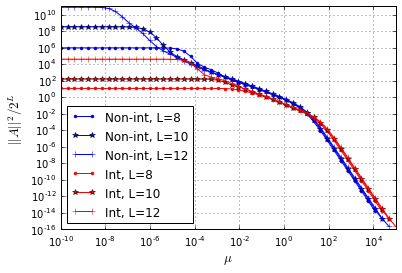

In [4]:
plt.loglog(x1,y1/2**8, 'b.-', label='Non-int, L=8')
plt.loglog(x3,y3/2**10, 'b*-', label='Non-int, L=10')
plt.loglog(x5,y5/2**12, 'b+-', label='Non-int, L=12')
plt.loglog(x2,y2/2**8, 'r.-', label='Int, L=8')
plt.loglog(x4,y4/2**10, 'r*-', label='Int, L=10')
plt.loglog(x6,y6/2**12, 'r+-', label='Int, L=12')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.grid()
#plt.savefig("new_v1.0_norm_L8_L10_L12.eps")

### Curve fitting: $1/x^{4}$ and $1/x$ scaling of nonintegrable model

In [26]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c

In [39]:
xdata =x5[42:50]
ydata = y5[42:50]/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-1]), np.log(ydata[0:-1]))
print popt, np.diag(pcov)
a_in,b_in=popt
print np.exp(a_in)

[ 6.08424612 -3.91500853] [ 0.1641367   0.00211617]
438.88882039


In [29]:
np.exp(a_in)

328.37721217848417

In [28]:
xdata =x5[15:35]
ydata = y5[15:35]/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-1]), np.log(ydata[0:-1]))
print popt
a_lin,b_lin=popt
print np.exp(a_lin)

[-0.38221431 -1.02377912]
0.682348802048


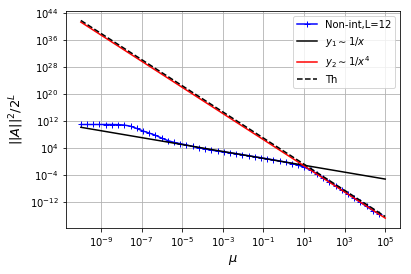

In [36]:
plt.loglog(x5,y5/2**12, 'b+-', label= "Non-int,L=12")
plt.loglog(x5, org_func(x5,np.exp(a_lin),b_lin), 'k-', label=r'$y_1 \sim 1/x$')
plt.loglog(x5, org_func(x5,np.exp(a_in),b_in), 'r-', label=r'$y_2 \sim 1/x^{4}$')
plt.loglog(x5, org_func(x5,1000,b_in), 'k--', label=r'Th')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.grid()
#plt.savefig("L12_two_scaling.eps")

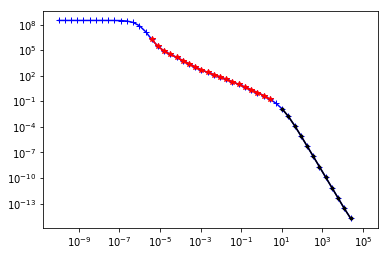

In [17]:
plt.loglog(x3,y3/2**10, 'b+-', label='Non-int, L=10')
plt.loglog(x3[15:35],y3[15:35]/2**10, 'r*-', label='Non-int, L=10')
plt.loglog(x3[36:50],y3[36:50]/2**10, 'k.-', label='Non-int, L=10')

In [95]:
xdata =x3[36:50]
ydata = y3[36:50]/2**10
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-2]), np.log(ydata[0:-2]))
print popt, np.diag(pcov)
a_in_L10,b_in_L10=popt
print np.exp(a_in_L10)

[ 5.51317797 -3.89123849] [ 0.05316345  0.00118964]
247.937815483


In [21]:
xdata =x1[36:50]
ydata = y1[36:50]/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-3]), np.log(ydata[0:-3]))
print popt, np.diag(pcov)
a_in_L8,b_in_L8=popt

[ 5.16432018 -3.90725513] [ 0.05217037  0.00132172]


### Curve fitting: $1/x^{4}$ and $1/x$ scaling of integrable model

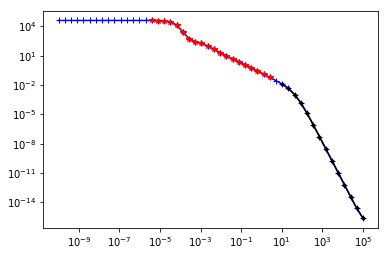

In [22]:
plt.loglog(x6,y6/2**12, 'b+-', label='Int, L=12')
plt.loglog(x6[15:35],y6[15:35]/2**12, 'r*-', label='Fit')
plt.loglog(x6[36:50],y6[36:50]/2**12, 'k.-',label='Fit')

In [24]:
xdata =x6[36:50]
ydata = y6[36:50]/2**12
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-2]), np.log(ydata[0:-2]))
print popt, np.diag(pcov)
a_int_L12,b_int_L12=popt

[ 6.06918238 -3.56621729] [ 0.60959032  0.01364087]


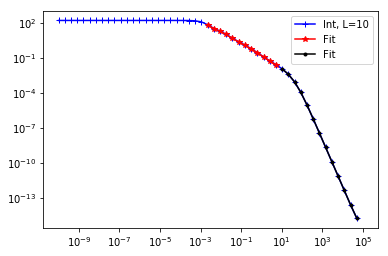

In [29]:
plt.loglog(x4,y4/2**10, 'b+-', label='Int, L=10')
plt.loglog(x4[24:36],y4[24:36]/2**10, 'r*-', label='Fit')
plt.loglog(x4[36:50],y4[36:50]/2**10, 'k.-',label='Fit')
plt.legend(loc='best')

In [111]:
xdata =x4[36:50]
ydata = y4[36:50]/2**10
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-2]), np.log(ydata[0:-2]))
print popt, np.diag(pcov)
a_int_L10,b_int_L10=popt
print np.exp(a_int_L10)

[ 5.94928895 -3.59738791] [ 0.54998172  0.012307  ]
383.480568384


In [30]:
xdata =x4[24:36]
ydata = y4[24:36]/2**10
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-2]), np.log(ydata[0:-2]))
print popt, np.diag(pcov)
a2_int_L10,b2_int_L10=popt

[-1.76320825 -0.98380761] [ 0.00248562  0.00019534]


In [27]:
xdata =x2[36:50]
ydata = y2[36:50]/2**8
popt, pcov = curve_fit(gfunc, np.log(xdata[0:-2]), np.log(ydata[0:-2]))
print popt, np.diag(pcov)
a_int_L10,b_int_L8=popt

[ 5.81655222 -3.63828172] [ 0.49751955  0.01113305]


### Scaling of $\mu_c^{(1)}$ (exponential in L?) and  $\mu_c^{(2)}$ (linear ?)

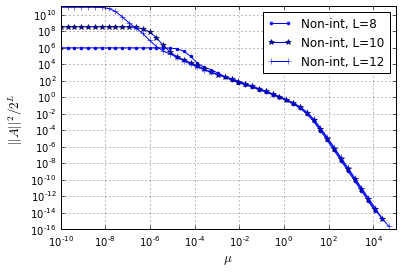

In [15]:
plt.loglog(x1,y1/2**8, 'b.-', label='Non-int, L=8')
plt.loglog(x3,y3/2**10, 'b*-', label='Non-int, L=10')
plt.loglog(x5,y5/2**12, 'b+-', label='Non-int, L=12')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.grid()
#plt.savefig("new_v1.0_norm_L8_L10_L12.eps")

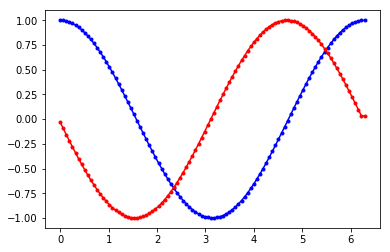

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

def deriv(y,x):
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2]) #last two elements are same
    return dy
plt.plot(x,y, 'b.-')
plt.plot(x,deriv(y,x), 'r.-')

In [49]:
def log_deriv(y,x):
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(np.log(y))/np.diff(np.log(x))
    dy[-1] = dy[-2]#(np.log(y[-1]) - np.log(y[-2]))/(np.log(x[-1]) - np.log(x[-2])) #last two elements are same
    return dy

In [50]:
print np.log(x3[0:-40])
print np.log(y1[0:-40]/2**8)
print log_deriv(y1[0:-40]/2**8,x1[0:-40])
print len(y1)

[-23.02585093 -22.32275342 -21.61730596 -20.91080096 -20.20625935
 -19.50155135 -18.79668414 -18.09173677 -17.3868559  -16.68198807]
[ 13.74994015  13.74994015  13.74994015  13.74994015  13.74994015
  13.74994014  13.7499401   13.74993993  13.74993926  13.74993652]
[ -4.93874931e-11  -2.01567937e-10  -8.24165913e-10  -3.38429824e-09
  -1.38551336e-08  -5.67227886e-08  -2.32248571e-07  -9.51127657e-07
  -3.89485531e-06  -3.89485531e-06]
50


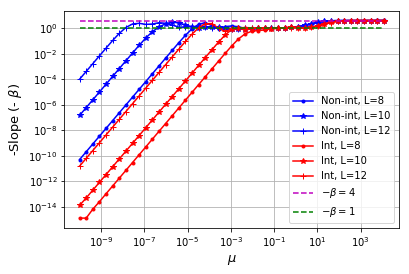

In [53]:
plt.loglog(x1[0:-3],-1*(log_deriv(y1[0:-3]/2**8,x1[0:-3])), 'b.-', label='Non-int, L=8')
plt.loglog(x3[0:-3],-1*(log_deriv(y3[0:-3]/2**10,x3[0:-3])),'b*-', label='Non-int, L=10')
plt.loglog(x5[0:-3],-1*(log_deriv(y5[0:-3]/2**12,x5[0:-3])), 'b+-', label='Non-int, L=12')
plt.loglog(x2[0:-3],-1*(log_deriv(y2[0:-3]/2**8,x2[0:-3])), 'r.-', label='Int, L=8')
plt.loglog(x4[0:-3],-1*(log_deriv(y4[0:-3]/2**10,x4[0:-3])),'r*-', label='Int, L=10')
plt.loglog(x6[0:-3],-1*(log_deriv(y6[0:-3]/2**12,x6[0:-3])), 'r+-', label='Int, L=12')
plt.loglog(x5[0:-3],4*np.ones(len(x5[0:-3])), 'm--', label=r'$-\beta=4$')
plt.loglog(x5[0:-3],np.ones(len(x5[0:-3])), 'g--', label=r'$-\beta=1$')
plt.ylabel(r"-Slope (- $\beta$)", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.savefig("slope.eps")
plt.grid()

In [ ]:
plt.loglog(x1[0:-3],-1*(log_deriv(y1[0:-3]/2**8,x1[0:-3])), 'b.-', label='Non-int, L=8')
plt.loglog(x3[0:-3],-1*(log_deriv(y3[0:-3]/2**10,x3[0:-3])),'b*-', label='Non-int, L=10')
plt.loglog(x5[0:-3],-1*(log_deriv(y5[0:-3]/2**12,x5[0:-3])), 'b+-', label='Non-int, L=12')

In [81]:
arr_nonintL8=-1*(log_deriv(y1[0:-3]/2**8,x1[0:-3]))
for i in range(len(x1)):
    if arr_nonintL8[i]>1:
        print i
        break
print arr_nonintL8[i],arr_nonintL8[i-1], x1[i]

18
2.05768535488 0.90690037968 3.2374575e-05


In [86]:
arr_nonintL10=-1*(log_deriv(y3[0:-3]/2**10,x3[0:-3]))
for i in range(len(x3)):
    if arr_nonintL10[i]>1:
        print i
        break
print arr_nonintL10[i],arr_nonintL10[i-1], x3[i]

12
1.23151530645 0.533438096222 4.71487e-07


In [87]:
arr_nonintL12=-1*(log_deriv(y5[0:-3]/2**12,x5[0:-3]))
for i in range(len(x3)):
    if arr_nonintL12[i]>1:
        print i
        break
print arr_nonintL12[i],arr_nonintL12[i-1], x5[i]

7
1.13668783958 0.394893588852 1.3895e-08


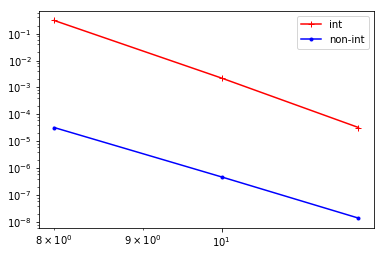

In [99]:
L=[8,10,12]
mu_c_nonint=[3.2374575e-05,4.71487e-07,1.3895e-08]
mu_c_int=[0.308884359648,0.002222996483, 3.2374575e-05]
plt.loglog(L,mu_c_int, 'r+-', label='int')
plt.loglog(L,mu_c_nonint, 'b.-', label='non-int')
plt.legend()

In [90]:
arr_intL8=-1*(log_deriv(y2[0:-3]/2**8,x2[0:-3]))
for i in range(len(x2)):
    if arr_intL8[i]>1:
        print i
        break
print arr_intL8[i],arr_intL8[i-1], x2[i]

31
1.07231917667 0.977280075815 0.308884359648


In [94]:
arr_intL10=-1*(log_deriv(y4[0:-3]/2**10,x4[0:-3]))
for i in range(len(x4)):
    if arr_intL10[i]>1:
        print i
        break
print arr_intL10[i],arr_intL10[i-1], x4[i]

24
1.0517000596 0.800563867082 0.002222996483


In [95]:
arr_intL12=-1*(log_deriv(y6[0:-3]/2**12,x6[0:-3]))
for i in range(len(x4)):
    if arr_intL12[i]>1:
        print i
        break
print arr_intL12[i],arr_intL12[i-1], x6[i]

18
1.08345223172 0.34700307303 3.2374575e-05


### Computing trace of $[H, \partial_{\lambda}H]$

In [61]:
def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC[[J,i,(i+1)] for i in range(L-1)] # OBC 
    
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

In [54]:
def comm_Ham(L): #writing by hand
    basis = spin_basis_1d(L)  
    J=1
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["yz",J_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

In [55]:
L=8
Ham_by_hand=comm_Ham(L)
mat=(Ham_by_hand**2).toarray()
print np.trace(mat)/2**8

(7+0j)


In [62]:
L=8
hz=5
Ham=Ham_int_antiferro(L,hz)
partial_lamb_H=del_lambda_Ham(L)

In [63]:
from quspin.operators import commutator
comm=commutator(Ham,partial_lamb_H)

In [64]:
mat=(comm**2).toarray()

In [65]:
print np.trace(mat)/2**8
print -4*2*(L)

(-64+0j)
-64


In [7]:
L=12
Ham=Ham_nonint(L)
partial_lamb_H=del_lambda_Ham(L)

In [8]:
comm=commutator(Ham,partial_lamb_H)

In [9]:
mat=(comm**2).toarray()
print np.trace(mat)/2**12

#print mat

(-119.416407865+0j)


In [112]:
hz=(np.sqrt(5)+1)/4 
print  4*(L*hz**2+2*(L-1))

119.416407865
